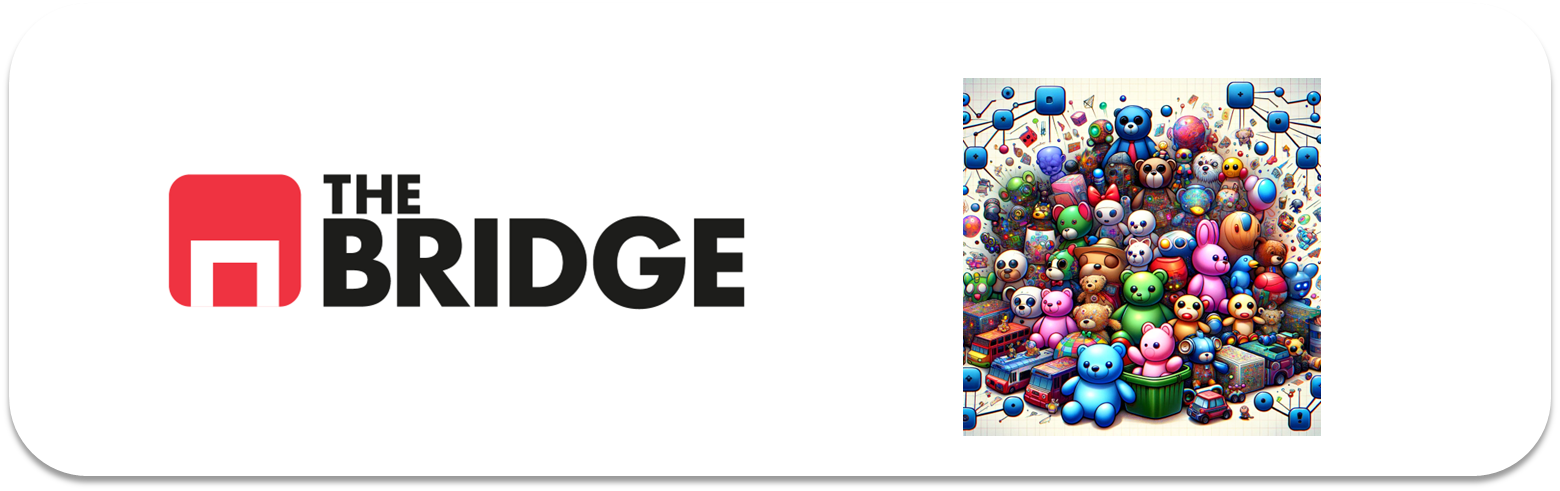

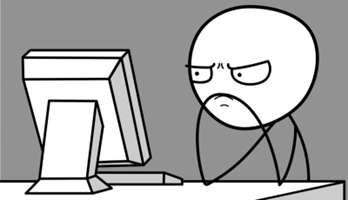

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [87]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [88]:
df = pd.read_csv("./data/empowering_drinks.csv",sep="|")

In [89]:
df.head(10)

Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.518613               0.232053  1.034819       1.013009  0.251717
1  0.246290              -0.827996  0.733629       0.965242 -0.293321
2  0.196879               1.109334  1.215533       1.395148  0.269020
3  1.691550               0.487926  1.466525       2.334574  1.186068
4  0.295700               1.840403  0.663351      -0.037874 -0.319276
5  1.716255               0.305159  0.492677       1.729520  0.083015
6  1.308617               0.890014  0.482637       1.745442 -0.003499
7  2.259772              -0.718336  0.954502       0.949319  0.061386
8  1.061565              -0.352802  1.125176       0.949319  0.935177
9  1.358028              -0.243142  1.295850       2.430109  0.299300

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [91]:
df.describe()

Azúcares  Vitamínas del grupo B     Cafeína  Ácido Cítrico  \
count  153.000000             153.000000  153.000000     153.000000   
mean     0.019231               0.037273    0.041057       0.080022   
std      1.026182               0.995984    1.040928       1.009450   
min     -2.434235              -3.679162   -1.695971      -1.493188   
25%     -0.816038              -0.499016   -1.043392      -0.738463   
50%      0.061000              -0.023821    0.211566      -0.165254   
75%      0.876275               0.707247    0.894264       0.917474   
max      2.259772               3.156325    3.062832       2.971473   

          Taurina  
count  153.000000  
mean    -0.044088  
std      0.934399  
min     -1.634288  
25%     -0.799428  
50%     -0.154899  
75%      0.493956  
max      2.431870

In [92]:
df.columns.to_list()

['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']

In [93]:
df.rename(columns={'Azúcares':'Azucares', 'Vitamínas del grupo B':'Vitaminas_del_grupo_B', 'Cafeína':'Cafeina', 'Ácido Cítrico':'Acido_Citrico', 'Taurina':'Taurina'},inplace=True)


In [94]:
df

Azucares  Vitaminas_del_grupo_B   Cafeina  Acido_Citrico   Taurina
0    1.518613               0.232053  1.034819       1.013009  0.251717
1    0.246290              -0.827996  0.733629       0.965242 -0.293321
2    0.196879               1.109334  1.215533       1.395148  0.269020
3    1.691550               0.487926  1.466525       2.334574  1.186068
4    0.295700               1.840403  0.663351      -0.037874 -0.319276
..        ...                    ...       ...            ...       ...
148  0.493343               0.414820 -1.284344       0.009893  0.969783
149  0.332758              -0.389355 -1.344582       0.280575  2.224236
150  0.209232               0.012732 -1.354622       0.296498  1.834923
151  1.395086               1.365208 -1.274305      -0.595160  1.791666
152  0.019564               0.039106 -1.500000       0.081020  0.500000

[153 rows x 5 columns]

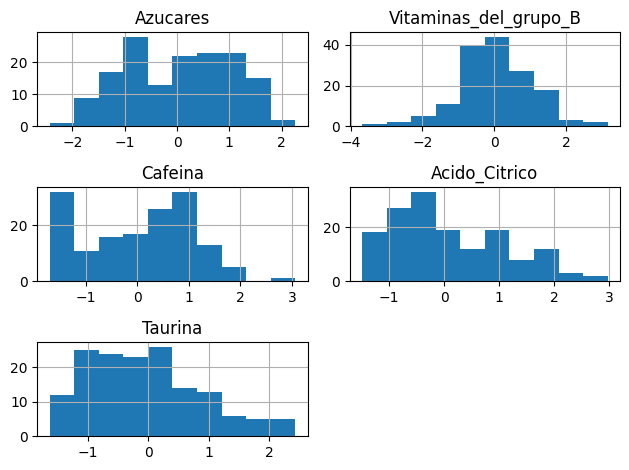

In [95]:
df.hist()
plt.tight_layout()

In [96]:
df.corr(numeric_only=True)

Azucares  Vitaminas_del_grupo_B   Cafeina  \
Azucares               1.000000               0.174354  0.258166   
Vitaminas_del_grupo_B  0.174354               1.000000  0.155276   
Cafeina                0.258166               0.155276  1.000000   
Acido_Citrico          0.672969               0.208444  0.497329   
Taurina                0.553245               0.215869 -0.124157   

                       Acido_Citrico   Taurina  
Azucares                    0.672969  0.553245  
Vitaminas_del_grupo_B       0.208444  0.215869  
Cafeina                     0.497329 -0.124157  
Acido_Citrico               1.000000  0.408325  
Taurina                     0.408325  1.000000

In [97]:
features=df.columns.to_list()

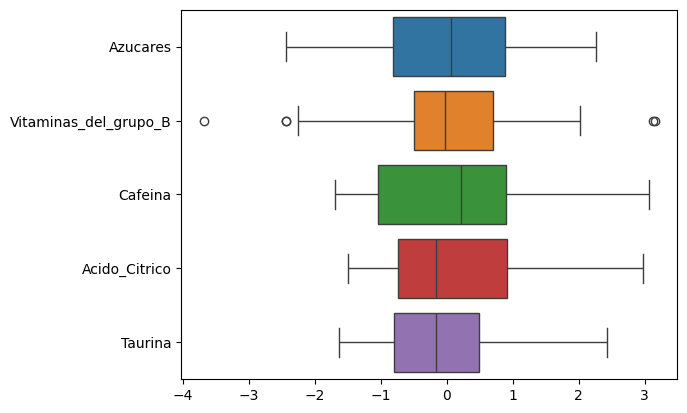

In [98]:
sns.boxplot(df[features], orient='h');

No tiene outliers excepto unos cuantos valores en "Vitaminas del Grupo B"

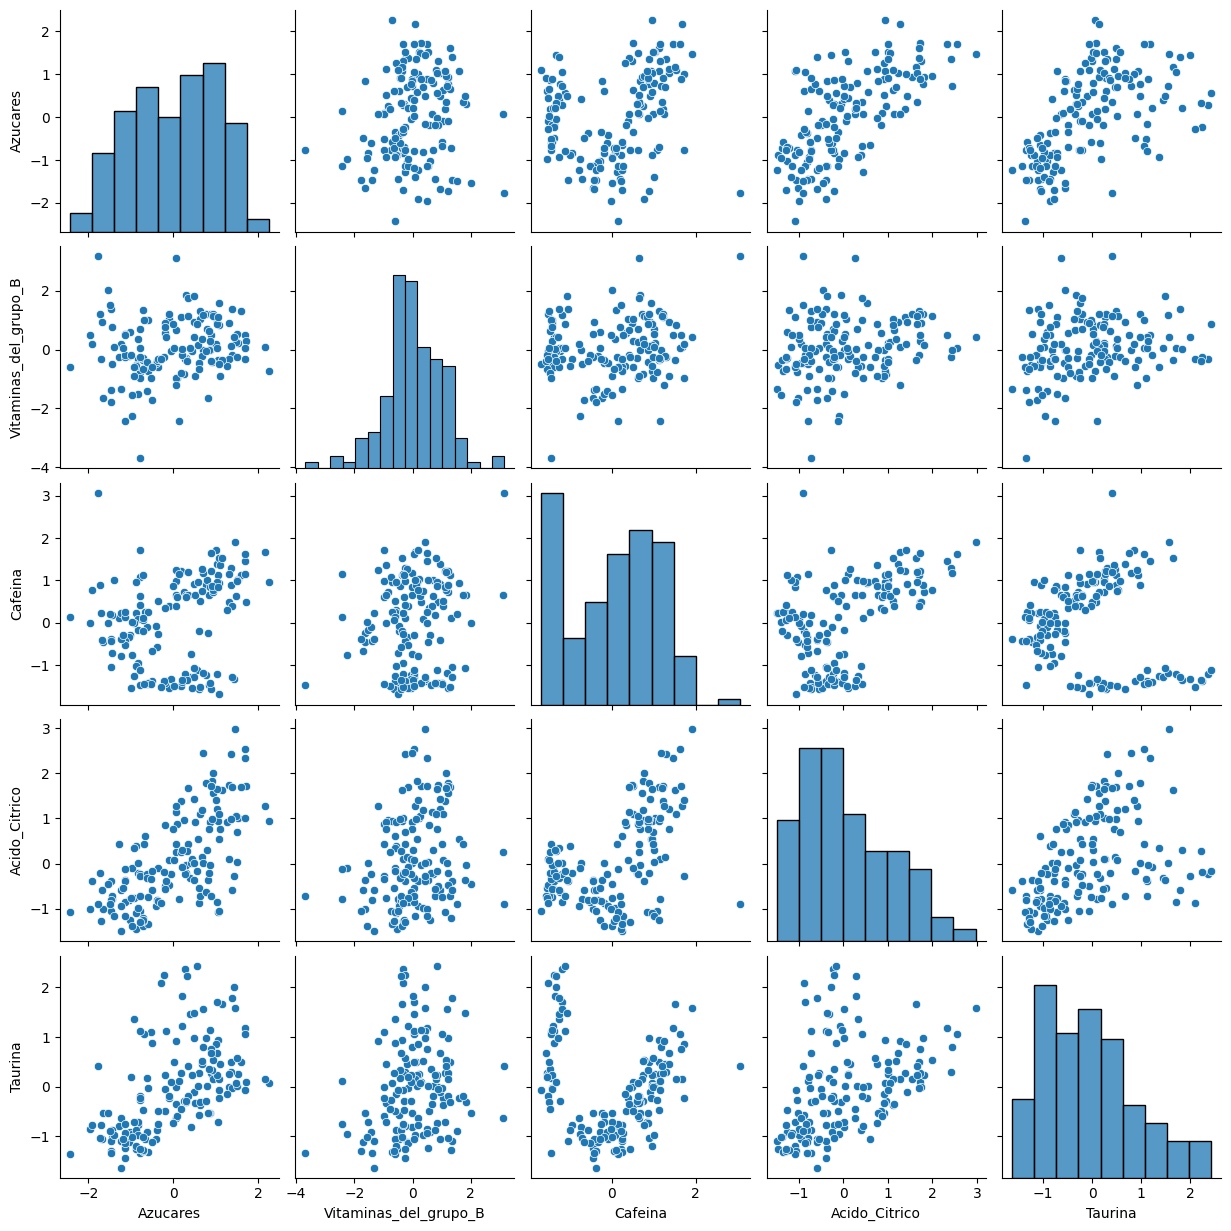

In [99]:
sns.pairplot(df)

Me quedo con 
Azucares
Vitaminas del Grupo B
Cafeina
Acido Citrico
Taurina

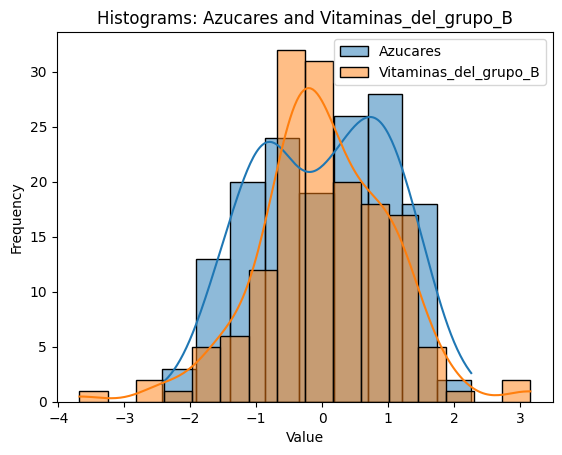

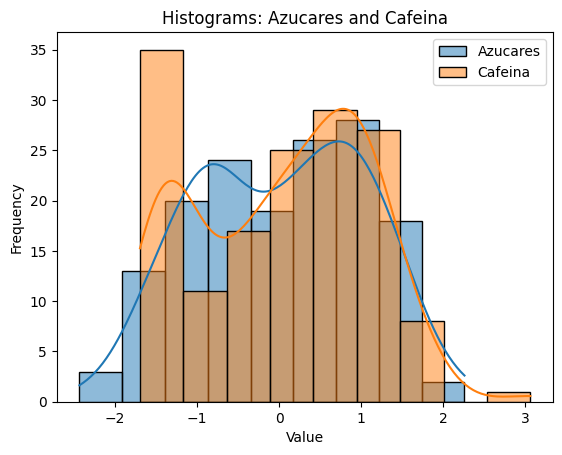

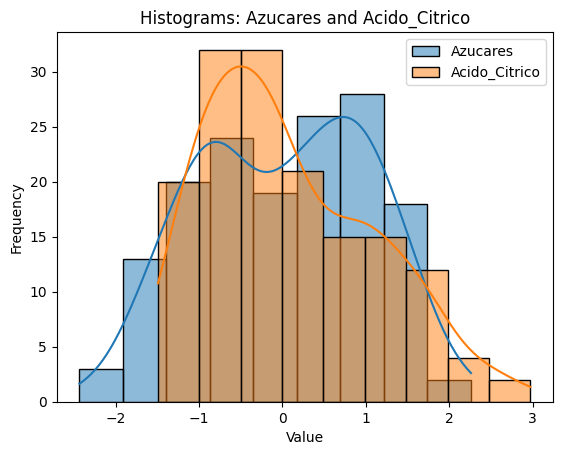

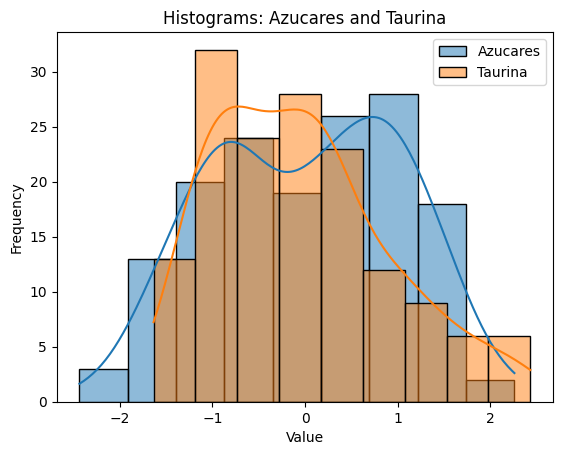

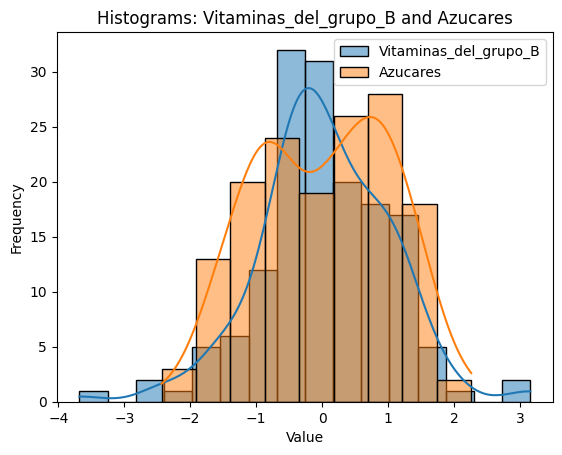

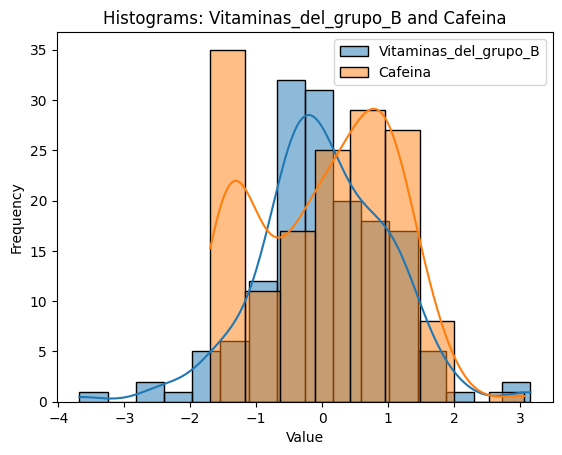

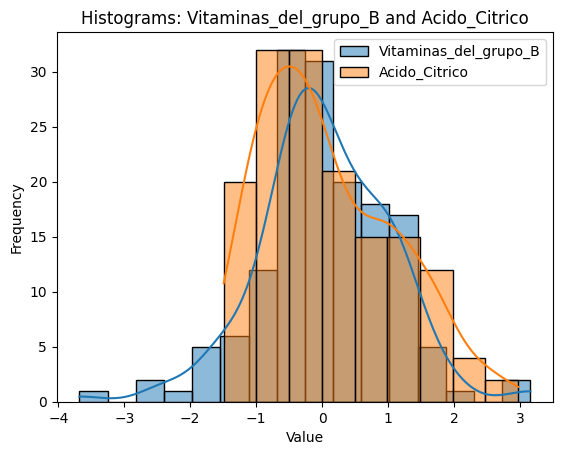

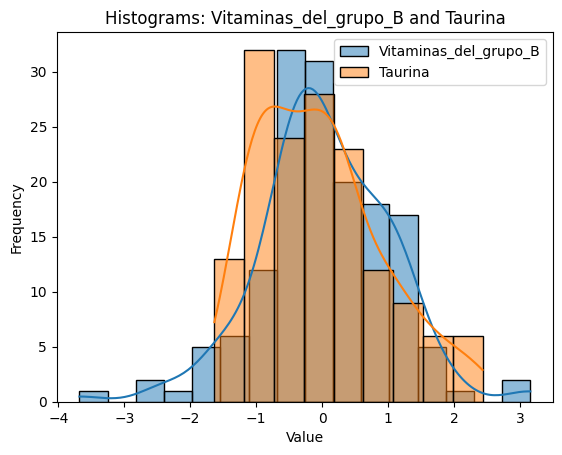

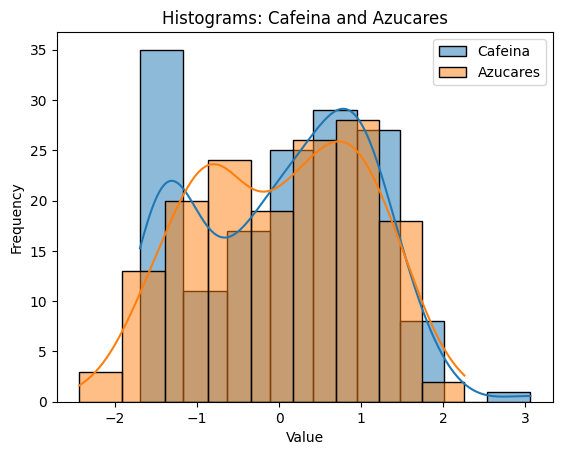

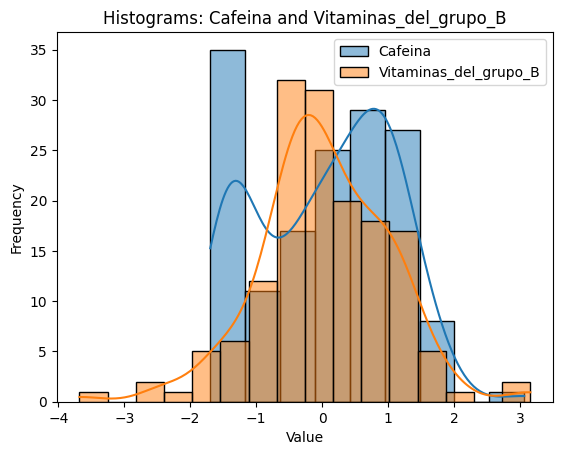

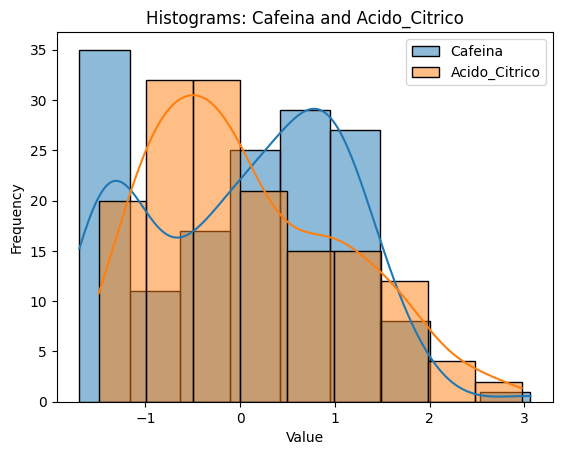

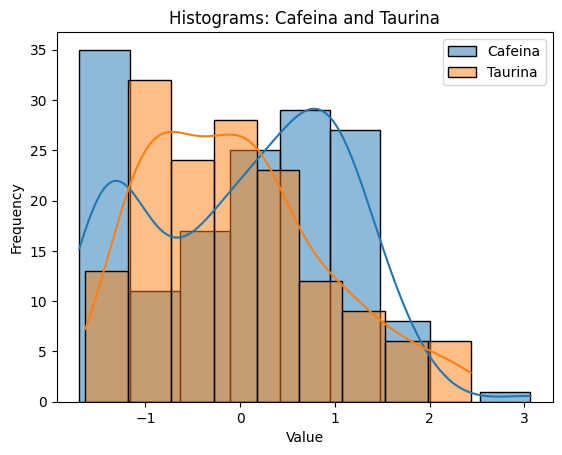

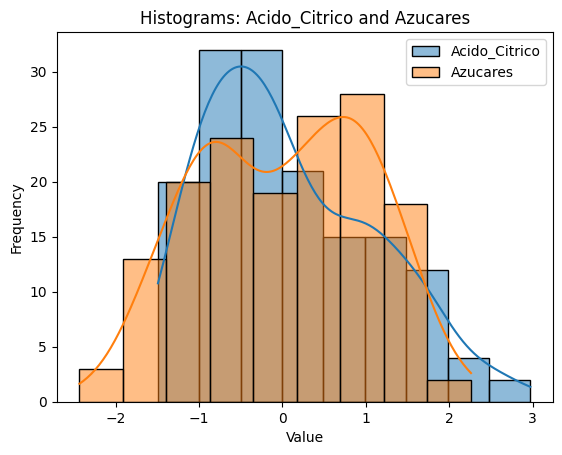

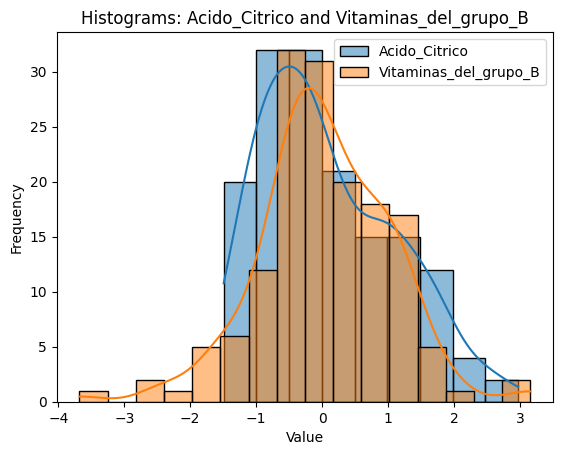

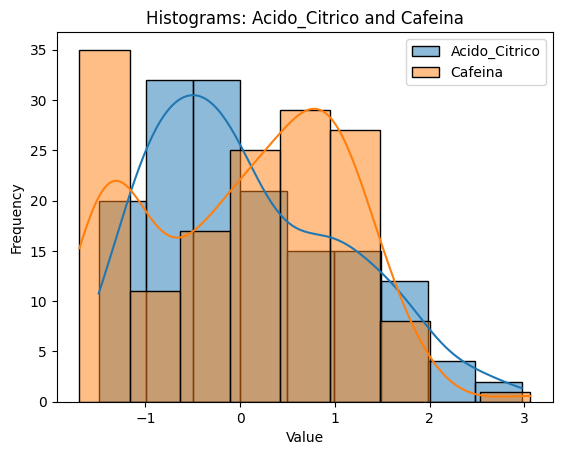

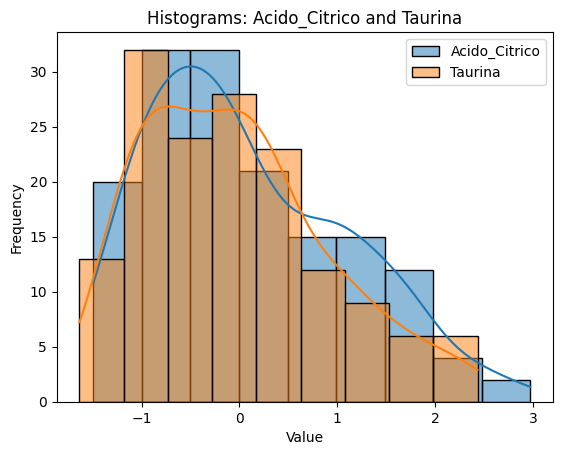

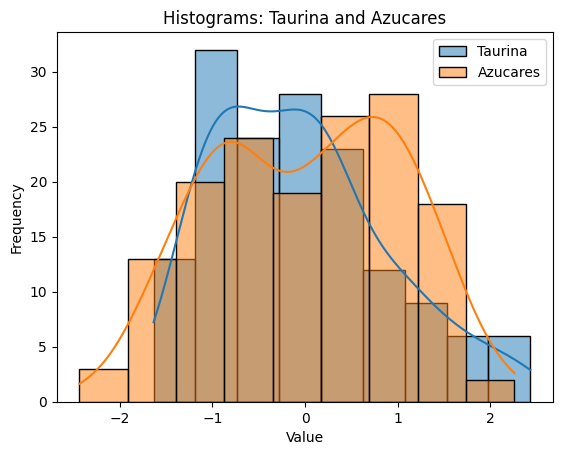

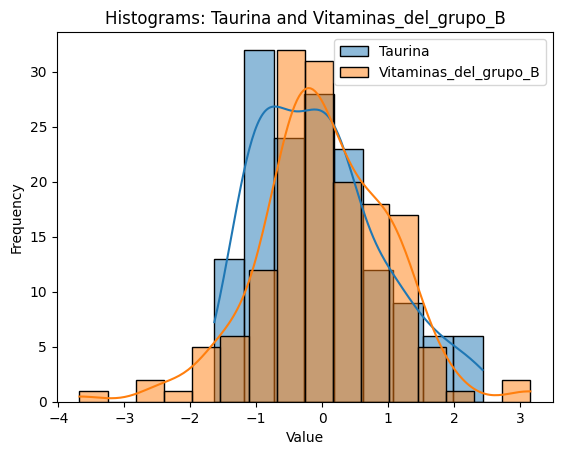

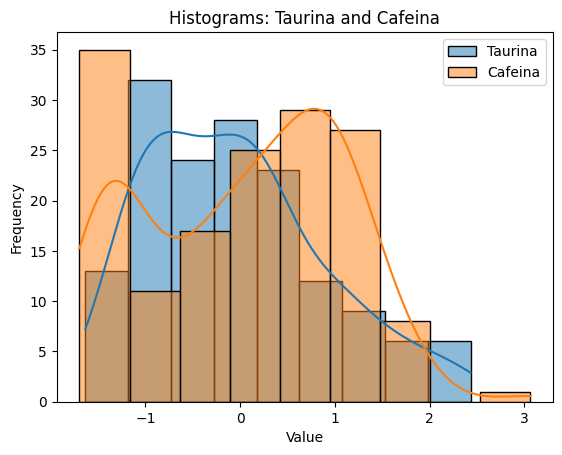

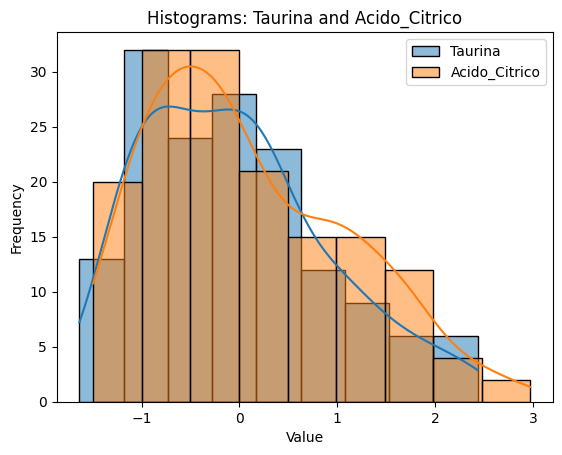

In [100]:
bt.pinta_numericas(df,features,True)

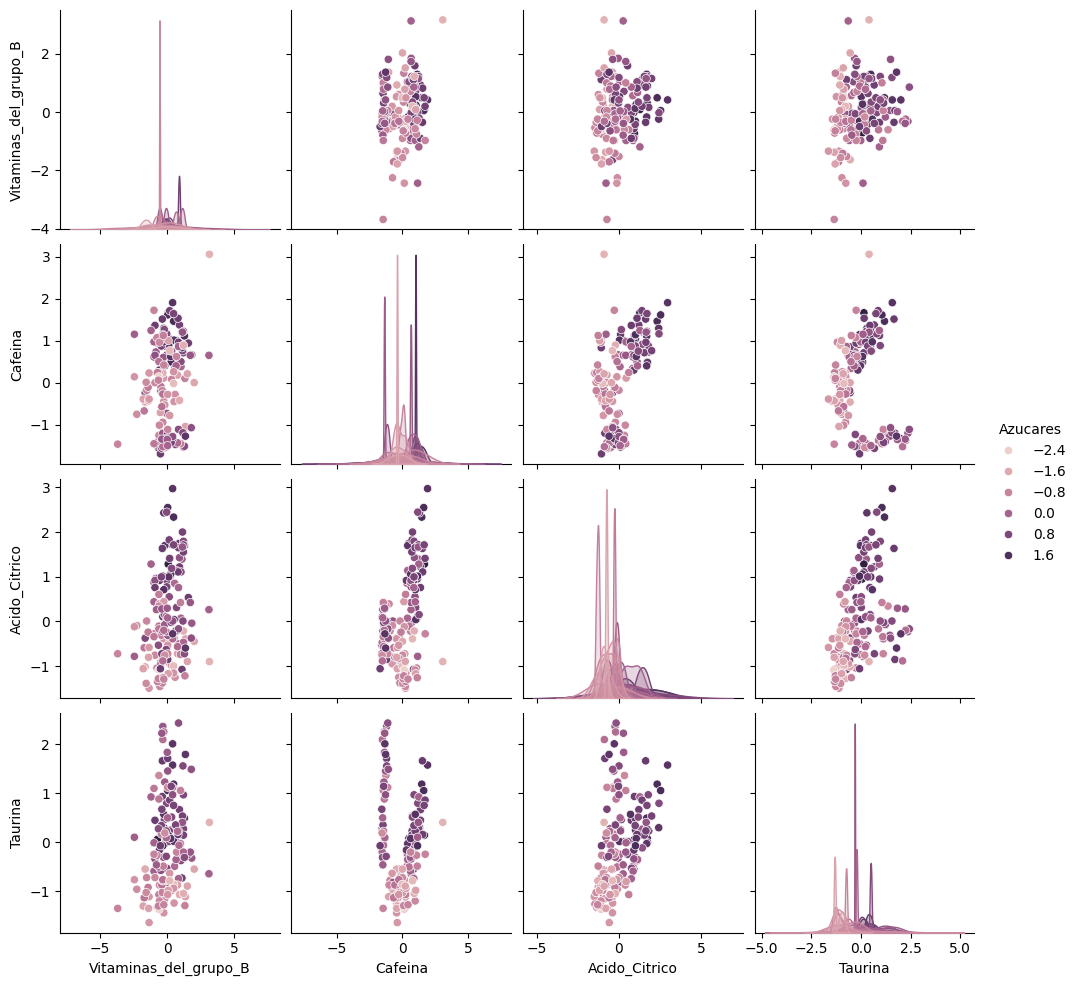

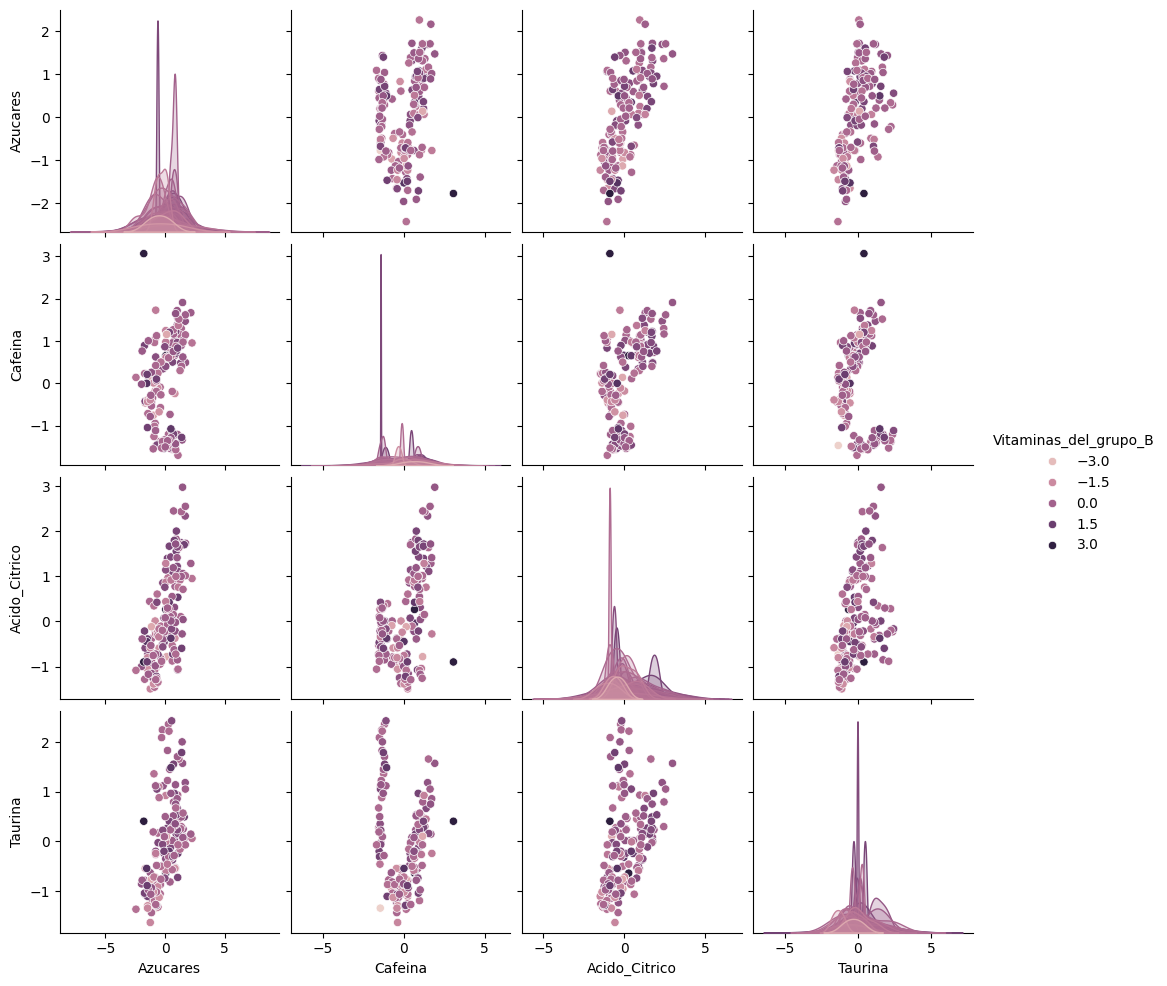

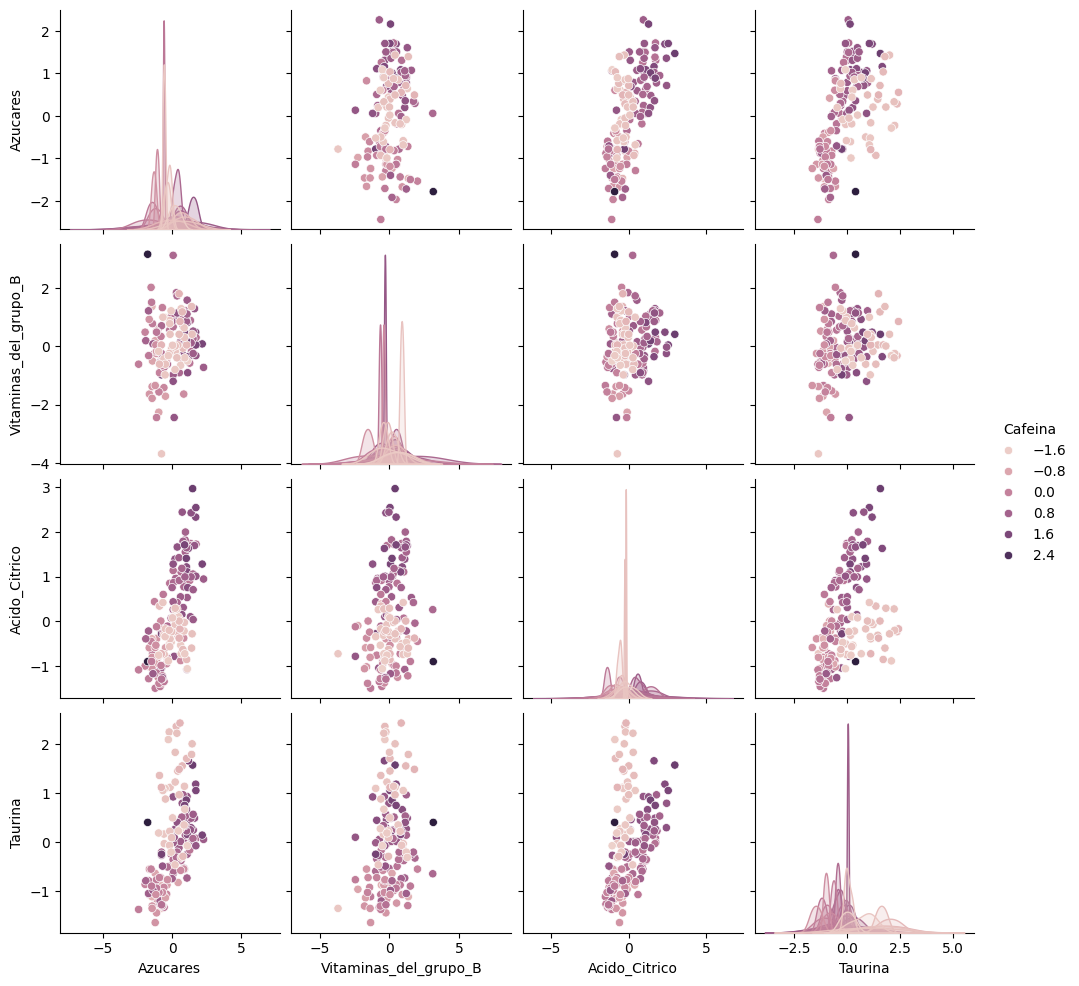

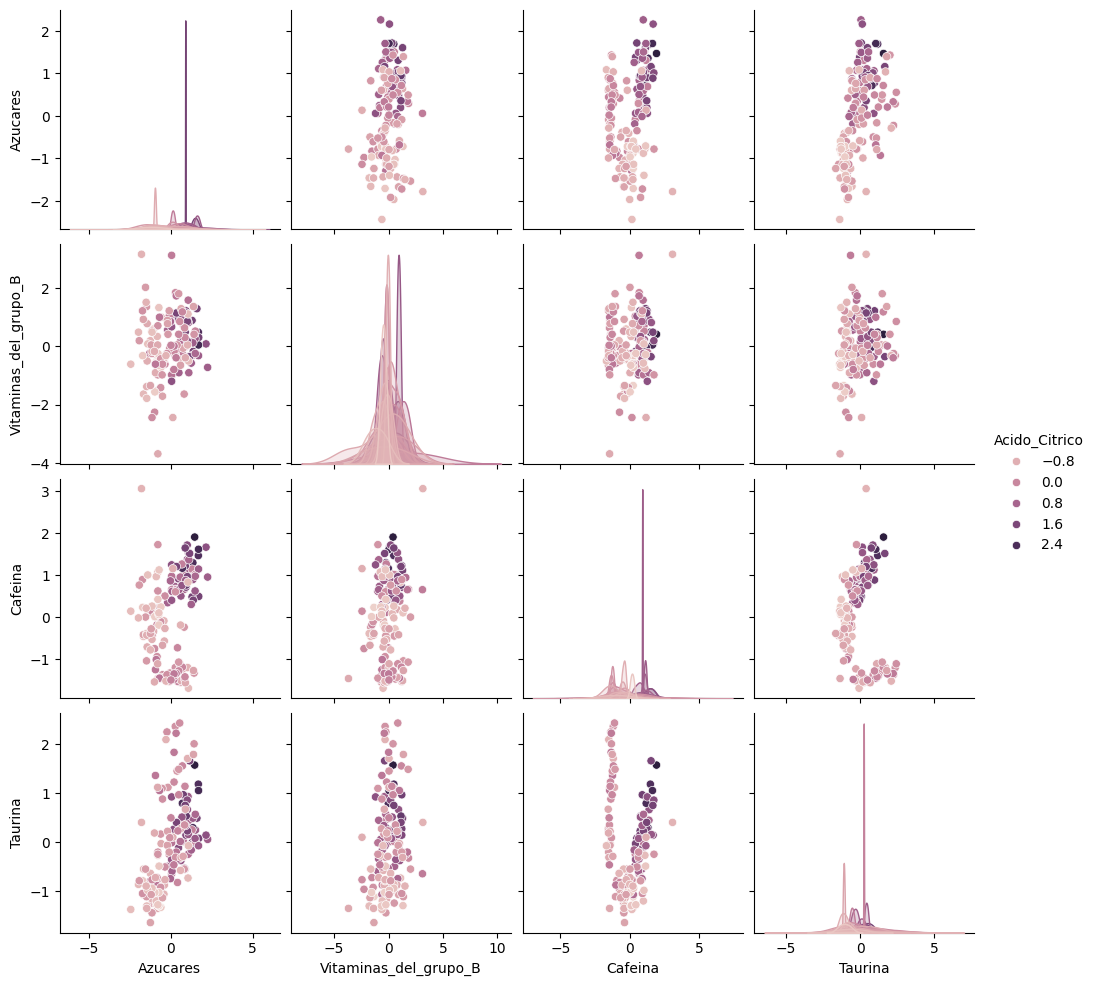

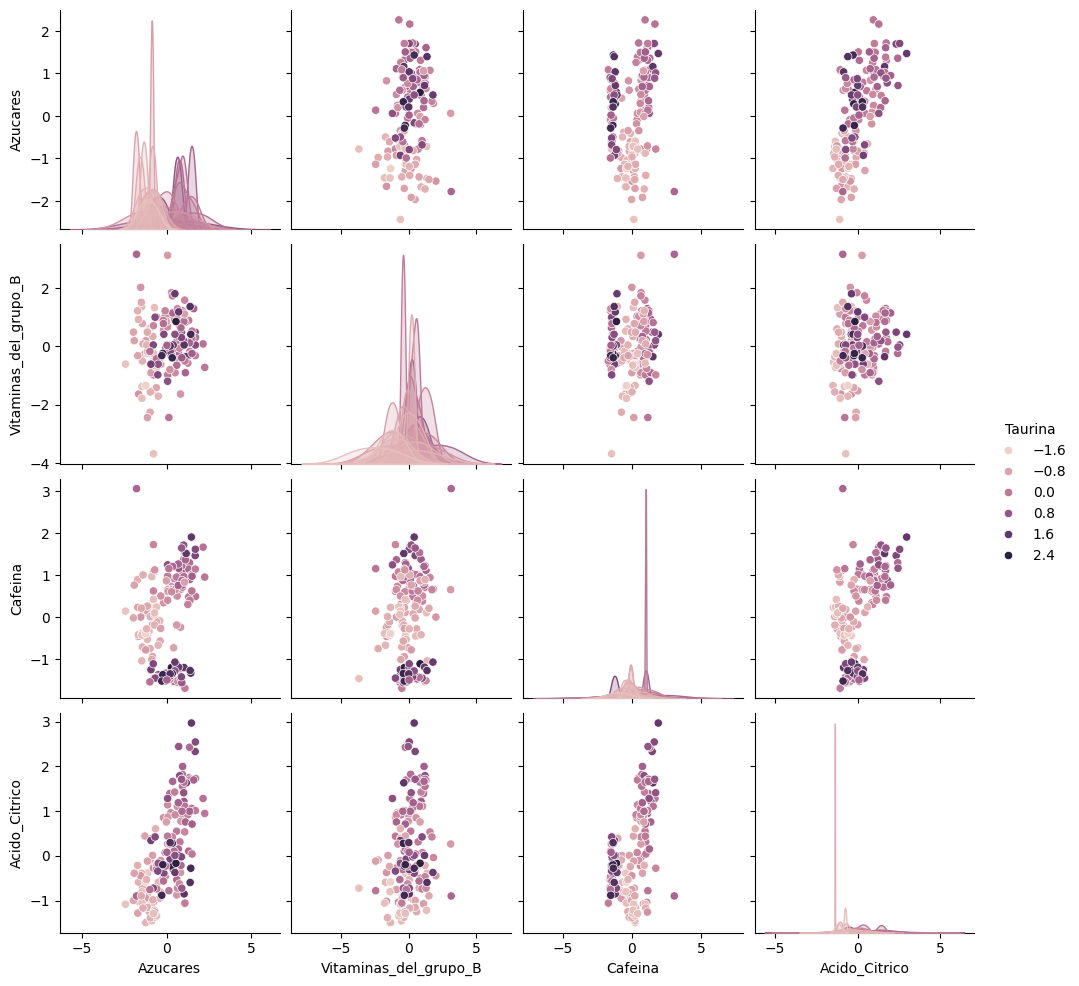

In [101]:

for columna in df.columns.to_list():
    sns.pairplot(df, hue = columna)

In [102]:
scaler = StandardScaler()
df_scal = scaler.fit_transform(df)

In [103]:
outlier_percent = []

for eps in np.linspace(0.001,3,50): # Genera 50 valores equidistantes entre 0.001 y 3
    
    # Creamos el modelo
    dbscan = DBSCAN(eps=eps,min_samples=2*df_scal.shape[1]) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
    dbscan.fit(df_scal)
   
     
    # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

In [104]:
df_scal.shape[1]

5

In [105]:
df.shape[1]

5

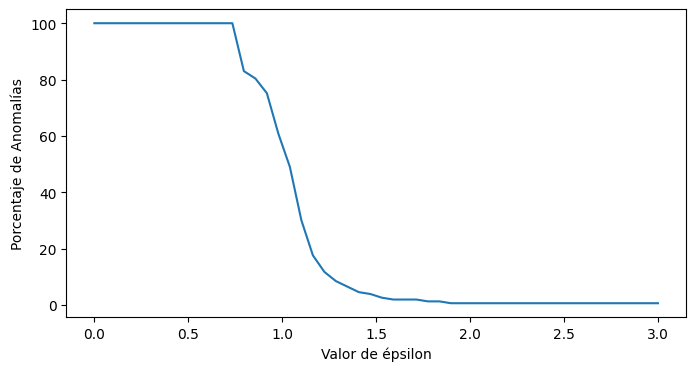

In [106]:
#Vamos a pintar ahora el porcentaje de anomalías vs el valor de eps probado
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Porcentaje de Anomalías")
plt.xlabel("Valor de épsilon")
plt.show()

In [107]:
for indice,eps in [(indice,val) for indice,val in enumerate(np.linspace(0.001,3,50)) if 1.5 <= val <= 2.2]:
    print(f"Para {eps}: {outlier_percent[indice]}% de anomalías")

Para 1.5311020408163265: 2.6143790849673203% de anomalías
Para 1.5923061224489796: 1.9607843137254901% de anomalías
Para 1.6535102040816325: 1.9607843137254901% de anomalías
Para 1.7147142857142856: 1.9607843137254901% de anomalías
Para 1.7759183673469388: 1.3071895424836601% de anomalías
Para 1.8371224489795916: 1.3071895424836601% de anomalías
Para 1.8983265306122448: 0.6535947712418301% de anomalías
Para 1.9595306122448979: 0.6535947712418301% de anomalías
Para 2.020734693877551: 0.6535947712418301% de anomalías
Para 2.081938775510204: 0.6535947712418301% de anomalías
Para 2.1431428571428572: 0.6535947712418301% de anomalías


In [108]:
#fit DBSCAN with eps = 2
#dbscan = DBSCAN(eps=2, min_samples= 2*len(df_wholesome_customers.columns.to_list()))
dbscan = DBSCAN(eps = 2)
dbscan.fit(df_scal)

DBSCAN(eps=2)

In [109]:
dbscan.min_samples

5

In [110]:
df['Labels'] = dbscan.labels_
df['Labels'].value_counts()

Labels
 0    152
-1      1
Name: count, dtype: int64

dbscan sin escalar

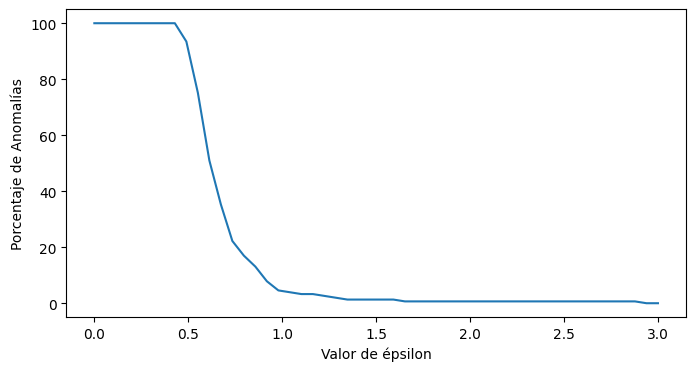

Para 1.5311020408163265: 1.3071895424836601% de anomalías
Para 1.5923061224489796: 1.3071895424836601% de anomalías
Para 1.6535102040816325: 0.6535947712418301% de anomalías
Para 1.7147142857142856: 0.6535947712418301% de anomalías
Para 1.7759183673469388: 0.6535947712418301% de anomalías
Para 1.8371224489795916: 0.6535947712418301% de anomalías
Para 1.8983265306122448: 0.6535947712418301% de anomalías
Para 1.9595306122448979: 0.6535947712418301% de anomalías
Para 2.020734693877551: 0.6535947712418301% de anomalías
Para 2.081938775510204: 0.6535947712418301% de anomalías
Para 2.1431428571428572: 0.6535947712418301% de anomalías


In [111]:
outlier_percent_no_scal = []

for eps in np.linspace(0.001,3,50): # Genera 50 valores equidistantes entre 0.001 y 3
    
    # Creamos el modelo
    dbscan_no_scal = DBSCAN(eps=eps,min_samples=2*df[features].shape[1]) # min_samples dos veces el ´numero de features -> 2 por dimensión del hiperespacio en el que representamos el conjunto de puntos... No le des muchas vueltas es un número muy orientativo. Pero piensa que si fuera un recta querrías 2 valores, un plano 4, un cubo 6...
    dbscan_no_scal.fit(df[features[0:3]])

    # Registramos el porcentaje de anomalías (recuerda que se etiquetan como -1)
    perc_outliers_no_scal = 100 * np.sum(dbscan_no_scal.labels_ == -1) / len(dbscan_no_scal.labels_)
    
    outlier_percent_no_scal.append(perc_outliers_no_scal)

#Vamos a pintar ahora el porcentaje de anomalías vs el valor de eps probado
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent_no_scal)
plt.ylabel("Porcentaje de Anomalías")
plt.xlabel("Valor de épsilon")
plt.show()
for indice,eps in [(indice,val) for indice,val in enumerate(np.linspace(0.001,3,50)) if 1.5 <= val <= 2.2]:
    print(f"Para {eps}: {outlier_percent_no_scal[indice]}% de anomalías")

In [112]:
#fit DBSCAN with eps = 2
#dbscan = DBSCAN(eps=2, min_samples= 2*len(df_wholesome_customers.columns.to_list()))
dbscan_no_scal = DBSCAN(eps = 1.6)
dbscan_no_scal.fit(df[features])
dbscan_no_scal.min_samples
df['Labels_no_scal'] = dbscan_no_scal.labels_
df['Labels_no_scal'].value_counts()

Labels_no_scal
 0    150
-1      3
Name: count, dtype: int64

Clustering model

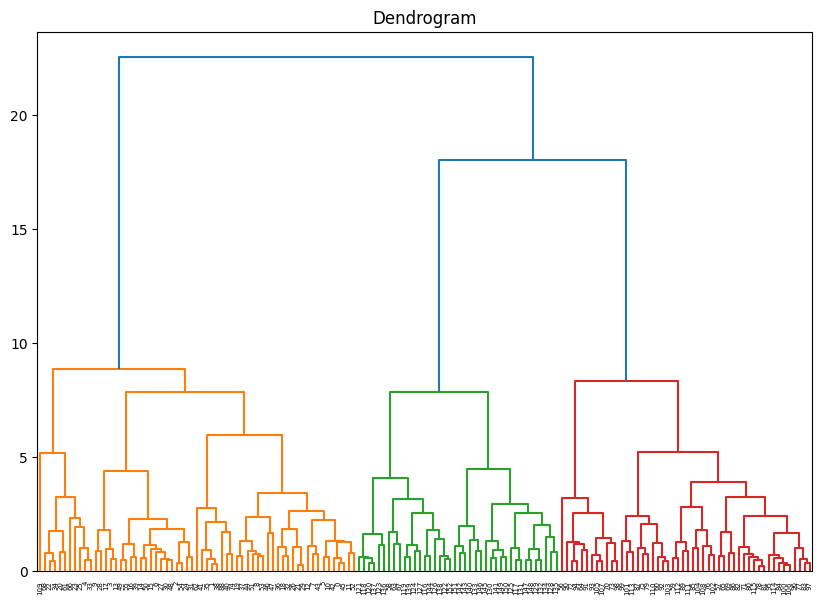

In [134]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")

selected_data = df_scal
clusters = shc.linkage(selected_data, 
            method='ward', # Este hiperparámetro y el siguiente tienen que ver con la distancia entre clústeres y los veremos un poco más adelante
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [135]:
link_method = linkage(df_scal, method = 'average')

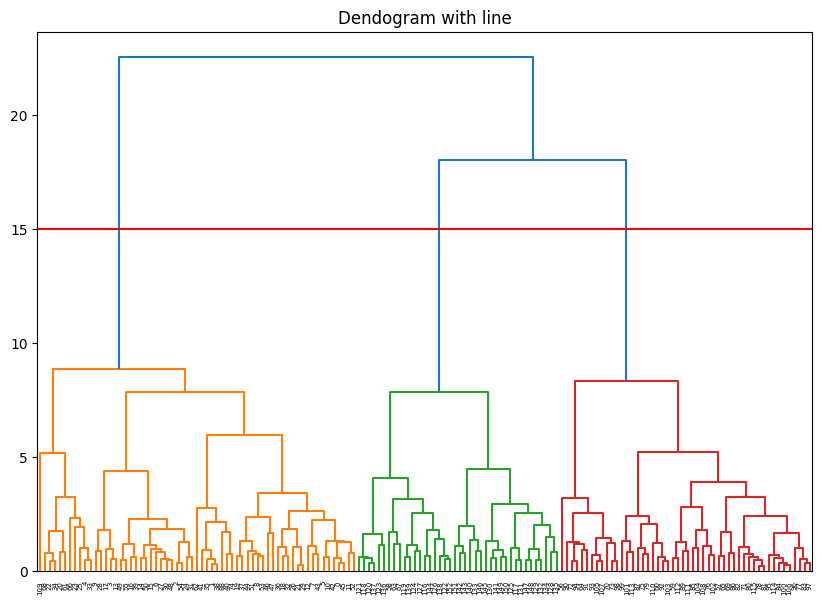

In [136]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 15, color = 'r', linestyle = '-')

3 parece un valor de clusters

In [137]:
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clustering_model.fit(df_scal)
df['Cluster']=clustering_model.labels_


In [138]:
df.Cluster.value_counts()

Cluster
0    151
2      1
1      1
Name: count, dtype: int64

In [139]:
features_mean_by_cluster = df[features + ["Cluster"]].groupby('Cluster').mean()
features_mean_by_cluster['Freq'] = df['Cluster'].value_counts().sort_index()

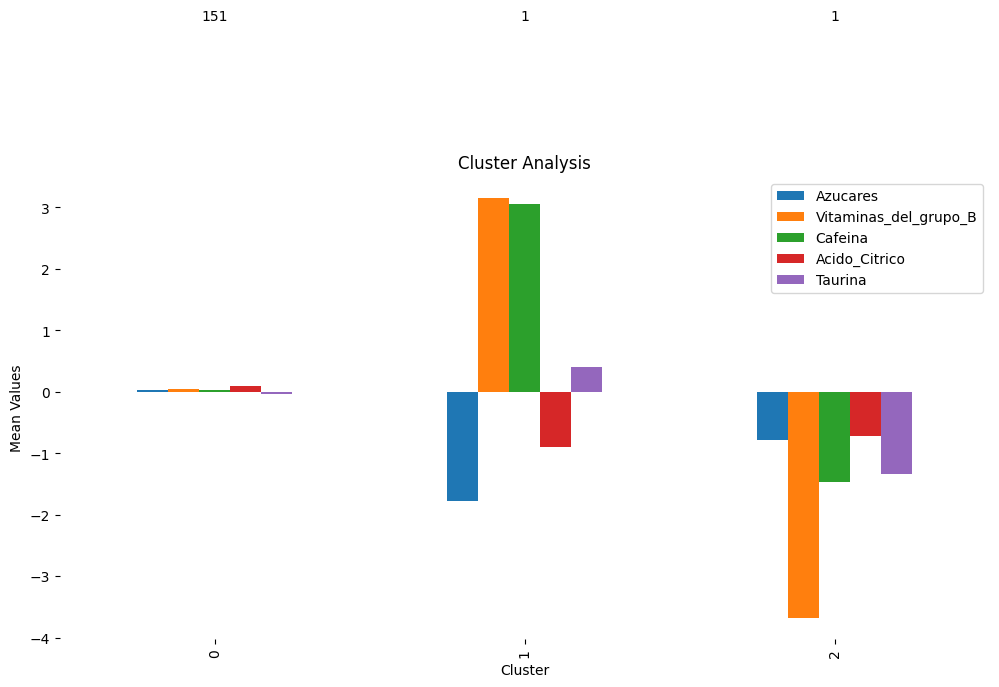

In [140]:
# Perfil de cada cluster
fig, ax = plt.subplots(figsize=(12, 6))
features_mean_by_cluster.iloc[:, :-1].plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Values')
ax.set_title('Cluster Analysis')
for i, v in enumerate(features_mean_by_cluster['Freq']):
    ax.text(i, max(features_mean_by_cluster.iloc[:, :-1].max().max(), 5) + 1, str(v), ha='center', va='bottom')
sns.despine(left=True, bottom=True)
plt.show()

Sin escalar

In [141]:
clustering_model_no_scal = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clustering_model_no_scal.fit(df[features])
df['Cluster_no_scal']=clustering_model_no_scal.labels_
df.Cluster_no_scal.value_counts()

Cluster_no_scal
0    151
2      1
1      1
Name: count, dtype: int64

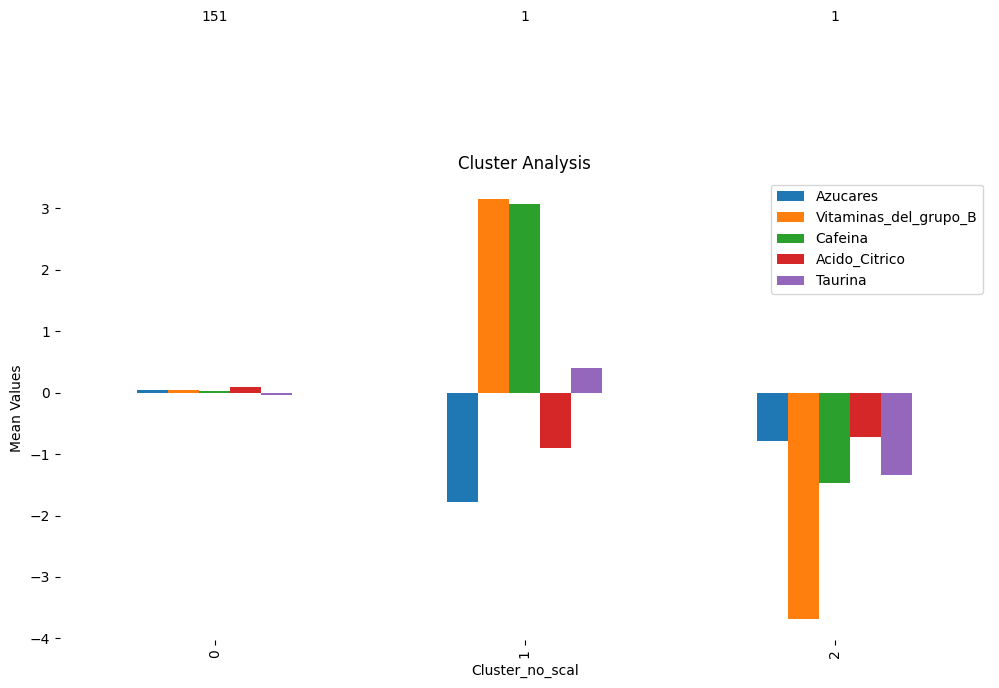

In [142]:
features_mean_by_cluster_no_scal = df[features + ["Cluster_no_scal"]].groupby('Cluster_no_scal').mean()
features_mean_by_cluster_no_scal['Freq'] = df['Cluster_no_scal'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
features_mean_by_cluster_no_scal.iloc[:, :-1].plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Values')
ax.set_title('Cluster Analysis')
for i, v in enumerate(features_mean_by_cluster_no_scal['Freq']):
    ax.text(i, max(features_mean_by_cluster_no_scal.iloc[:, :-1].max().max(), 5) + 1, str(v), ha='center', va='bottom')
sns.despine(left=True, bottom=True)
plt.show()

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [119]:
df_new = pd.read_csv("./data/new_experiments.csv",sep="|")
df_new.rename(columns={'Azúcares':'Azucares', 'Vitamínas del grupo B':'Vitaminas_del_grupo_B', 'Cafeína':'Cafeina', 'Ácido Cítrico':'Acido_Citrico', 'Taurina':'Taurina'},inplace=True)


In [120]:
df_new

Azucares  Vitaminas_del_grupo_B   Cafeina  Acido_Citrico   Taurina
0  1.481555               0.305159  1.366128       2.239039  0.731870
1  0.616869               0.890014  0.583034       0.312420 -0.665332
2 -1.680724               0.341713 -0.340615      -0.213021 -0.976782
3 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240
4 -0.927212               0.634140 -1.565455      -0.085641 -0.522583
5  0.962743              -0.243142 -1.354622      -0.420013  1.956043

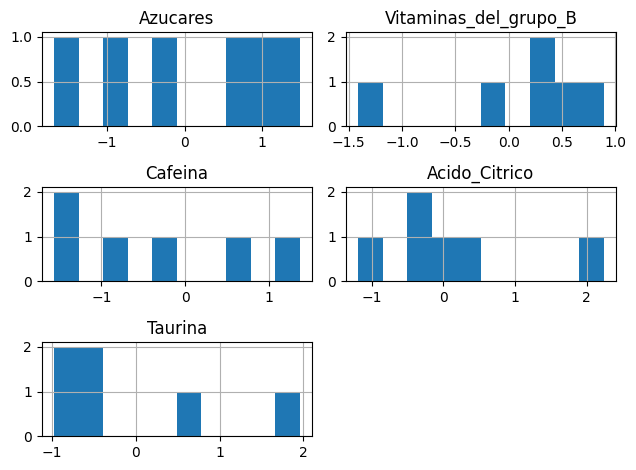

In [121]:
df_new.hist()
plt.tight_layout()

In [122]:
df_new.corr(numeric_only=True)

Azucares  Vitaminas_del_grupo_B   Cafeina  \
Azucares               1.000000              -0.001451  0.493067   
Vitaminas_del_grupo_B -0.001451               1.000000  0.306127   
Cafeina                0.493067               0.306127  1.000000   
Acido_Citrico          0.554187               0.537002  0.784770   
Taurina                0.709954              -0.101477 -0.060414   

                       Acido_Citrico   Taurina  
Azucares                    0.554187  0.709954  
Vitaminas_del_grupo_B       0.537002 -0.101477  
Cafeina                     0.784770 -0.060414  
Acido_Citrico               1.000000  0.262770  
Taurina                     0.262770  1.000000

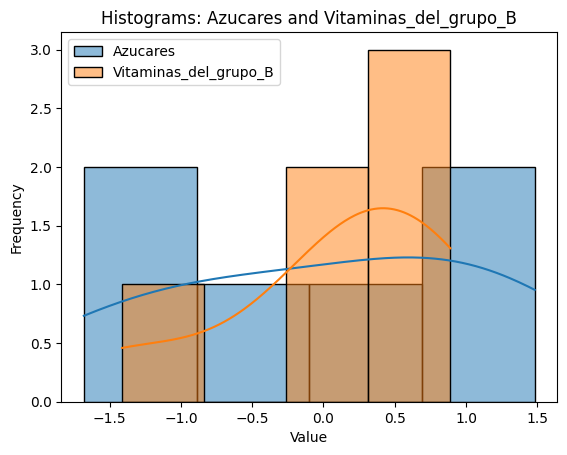

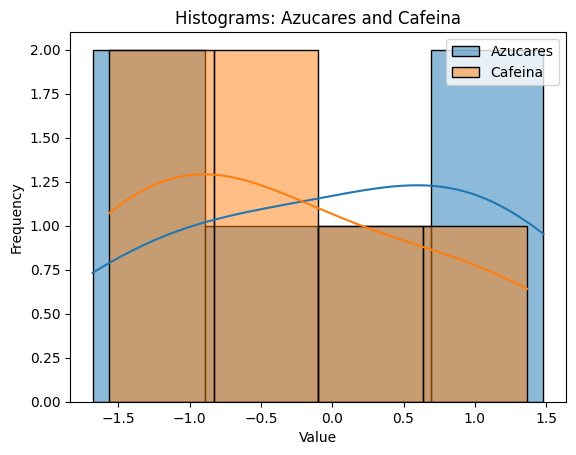

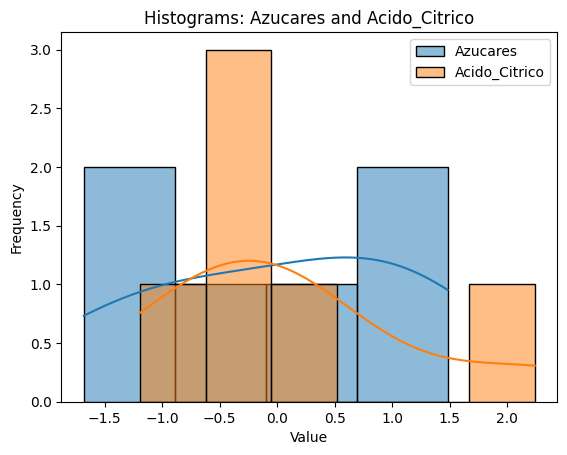

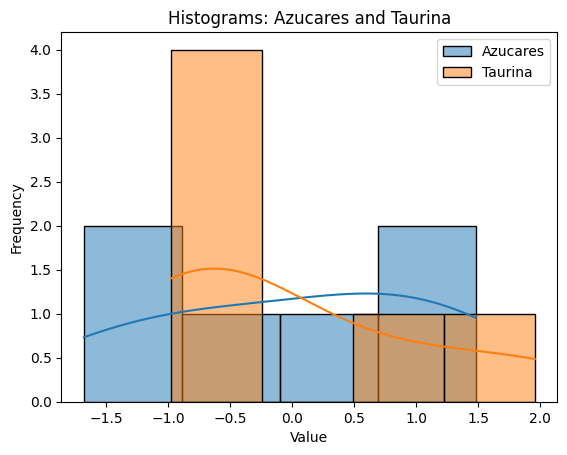

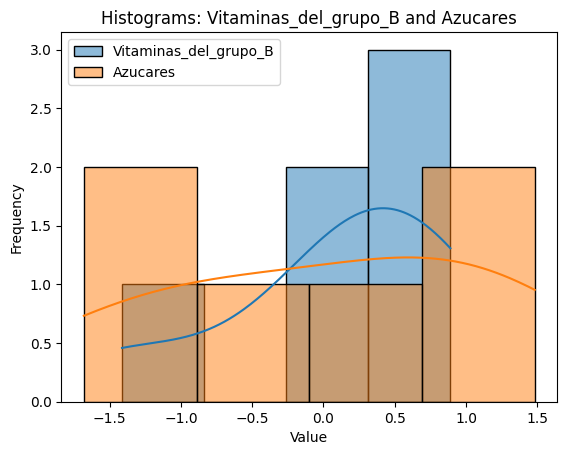

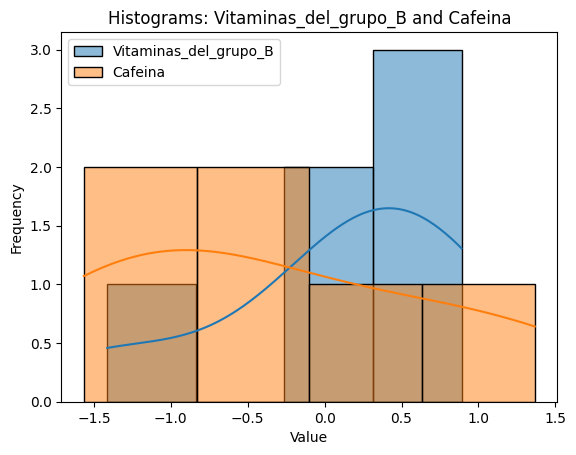

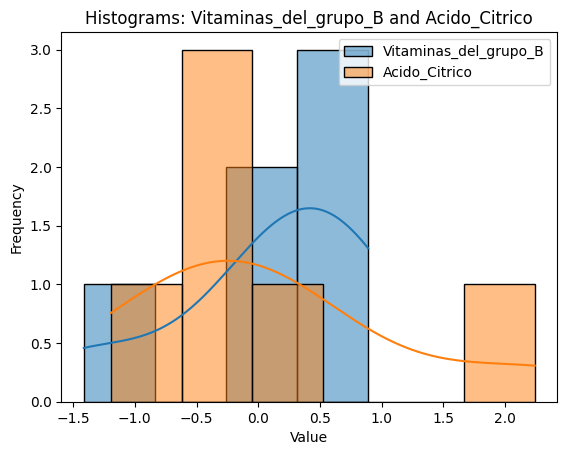

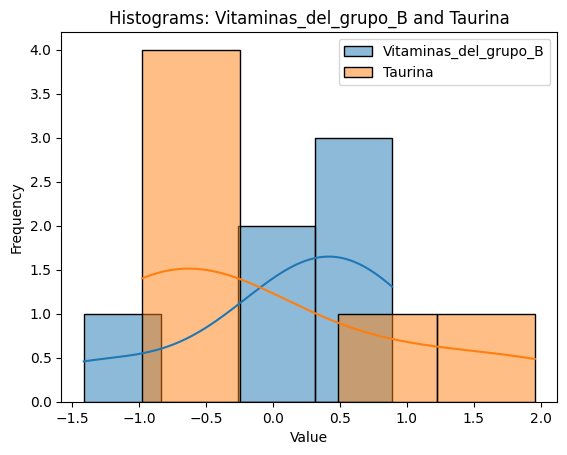

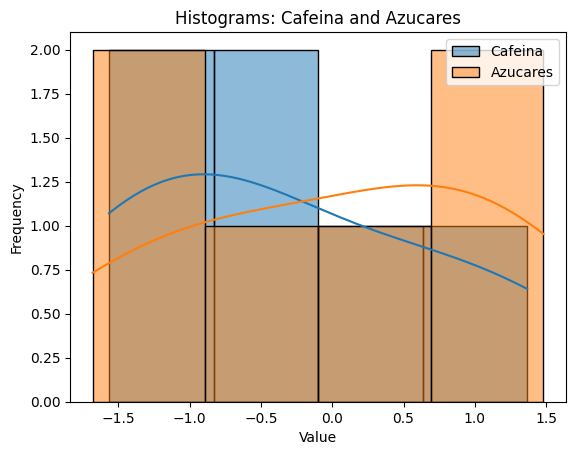

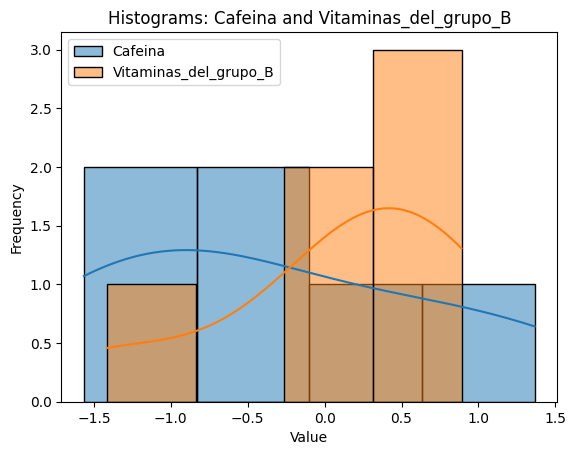

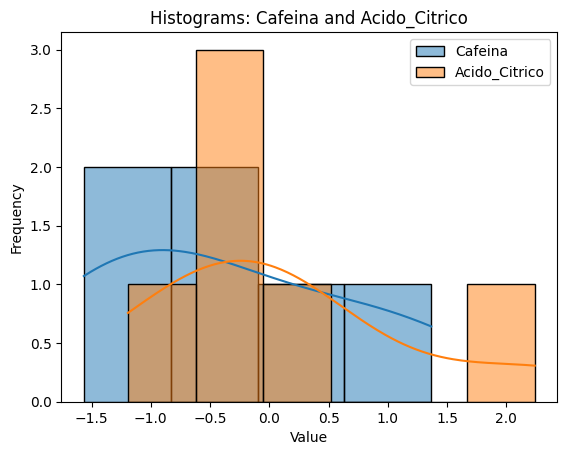

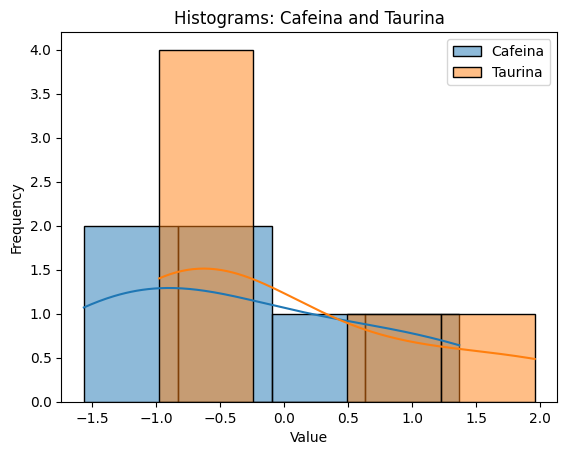

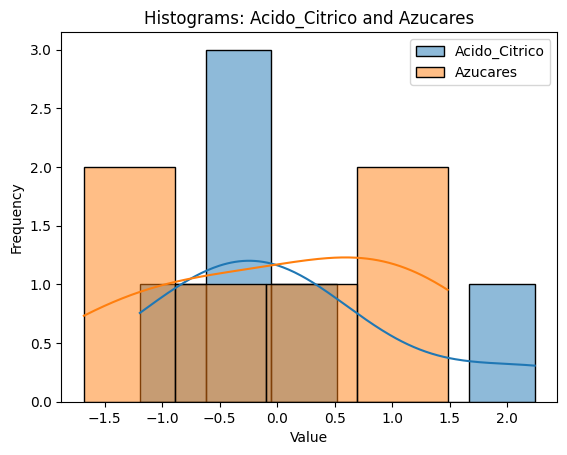

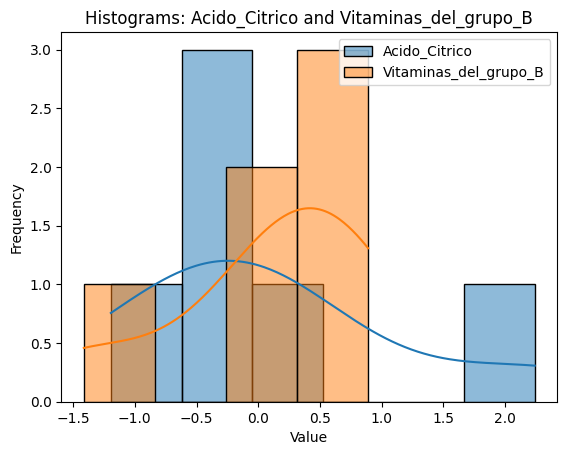

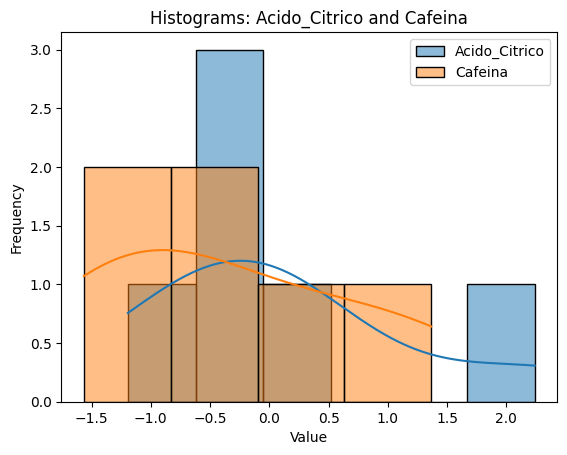

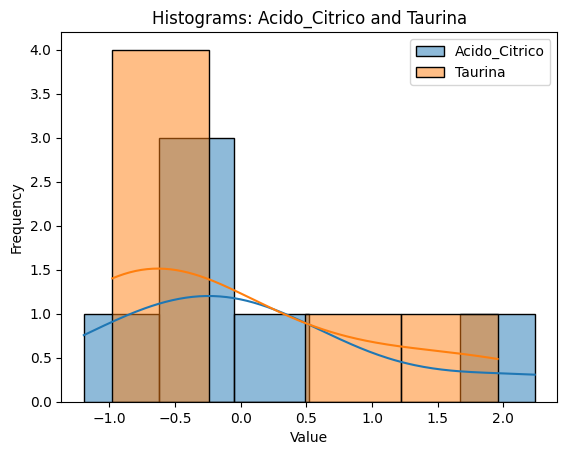

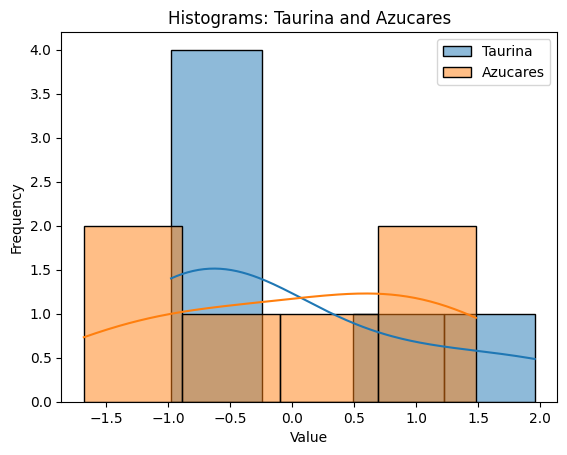

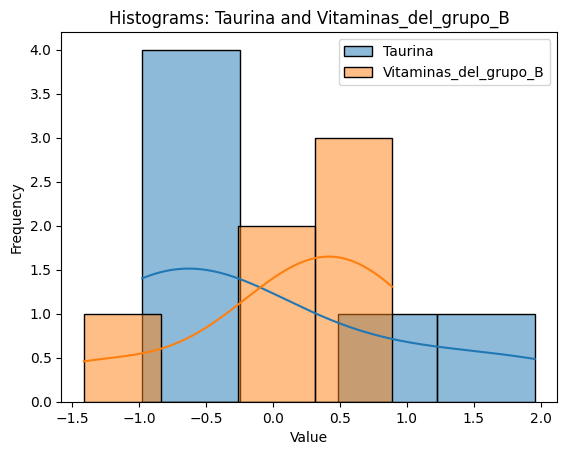

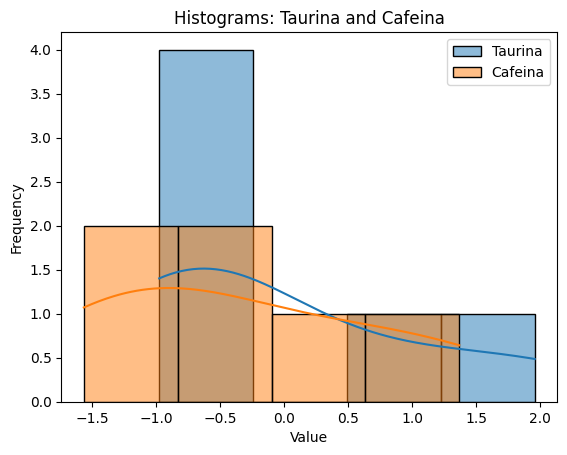

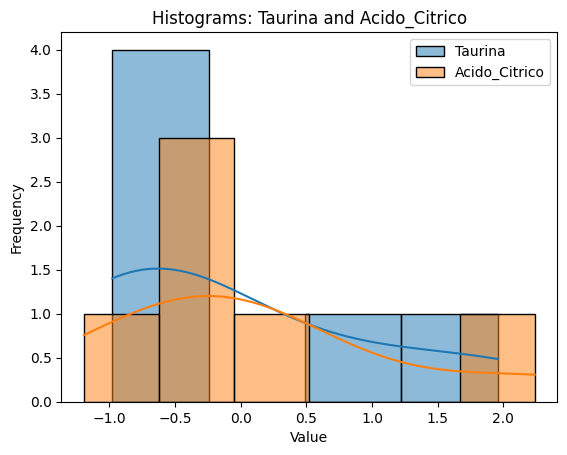

In [123]:
bt.pinta_numericas(df_new,features,True)

Sin escalar

In [143]:
clustering_model_no_scal_df_new = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clustering_model_no_scal_df_new.fit(df_new[features])
df_new['Cluster_no_scal']=clustering_model_no_scal_df_new.labels_
df_new.Cluster_no_scal.value_counts()

Cluster_no_scal
1    3
0    2
2    1
Name: count, dtype: int64

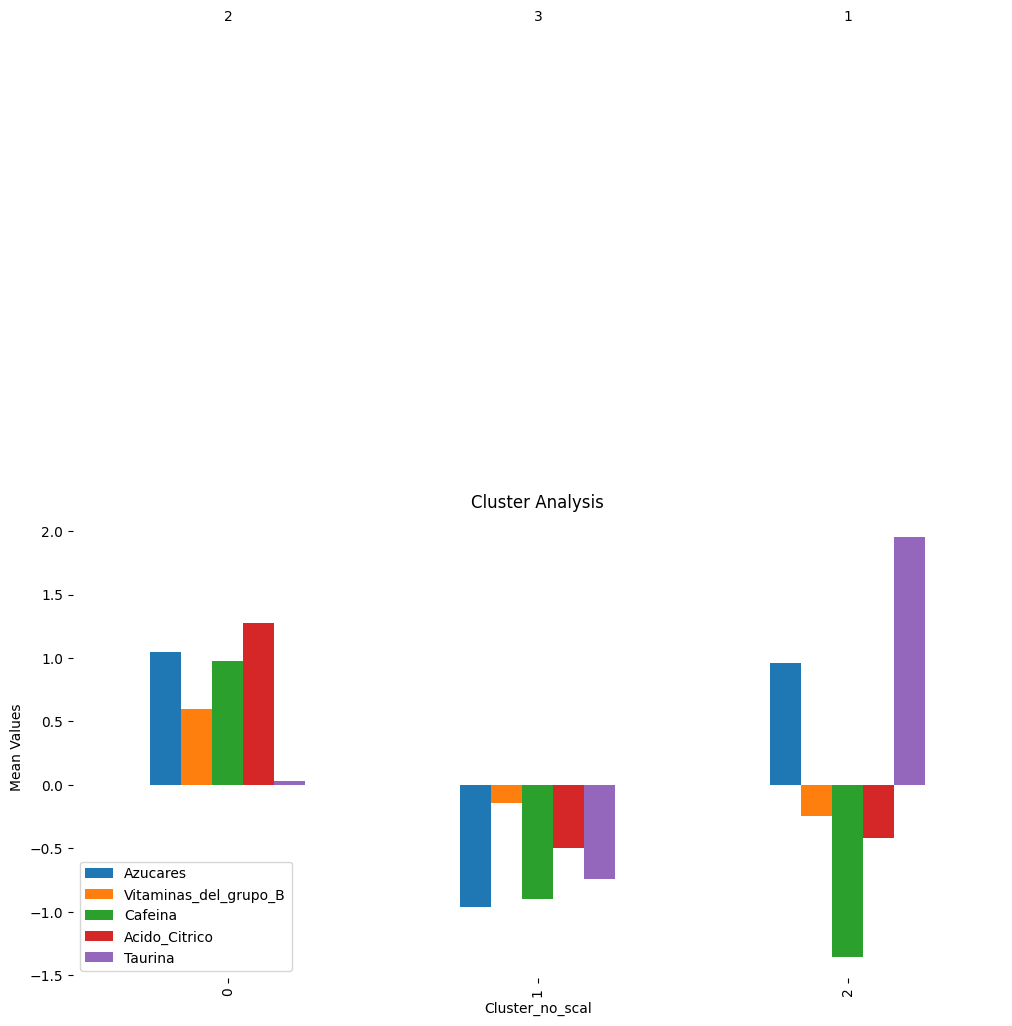

In [144]:
features_mean_by_cluster_no_scal_df_new = df_new[features + ["Cluster_no_scal"]].groupby('Cluster_no_scal').mean()
features_mean_by_cluster_no_scal_df_new['Freq'] = df_new['Cluster_no_scal'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
features_mean_by_cluster_no_scal_df_new.iloc[:, :-1].plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Values')
ax.set_title('Cluster Analysis')
for i, v in enumerate(features_mean_by_cluster_no_scal_df_new['Freq']):
    ax.text(i, max(features_mean_by_cluster_no_scal_df_new.iloc[:, :-1].max().max(), 5) + 1, str(v), ha='center', va='bottom')
sns.despine(left=True, bottom=True)
plt.show()

Escalando

In [145]:
scaler=StandardScaler()
df_new_scal= scaler.fit_transform(df_new)
clustering_model_scal_df_new = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clustering_model_scal_df_new.fit(df_new_scal)
df_new['Cluster_scal']=clustering_model_scal_df_new.labels_
df_new.Cluster_scal.value_counts()

Cluster_scal
0    3
1    2
2    1
Name: count, dtype: int64

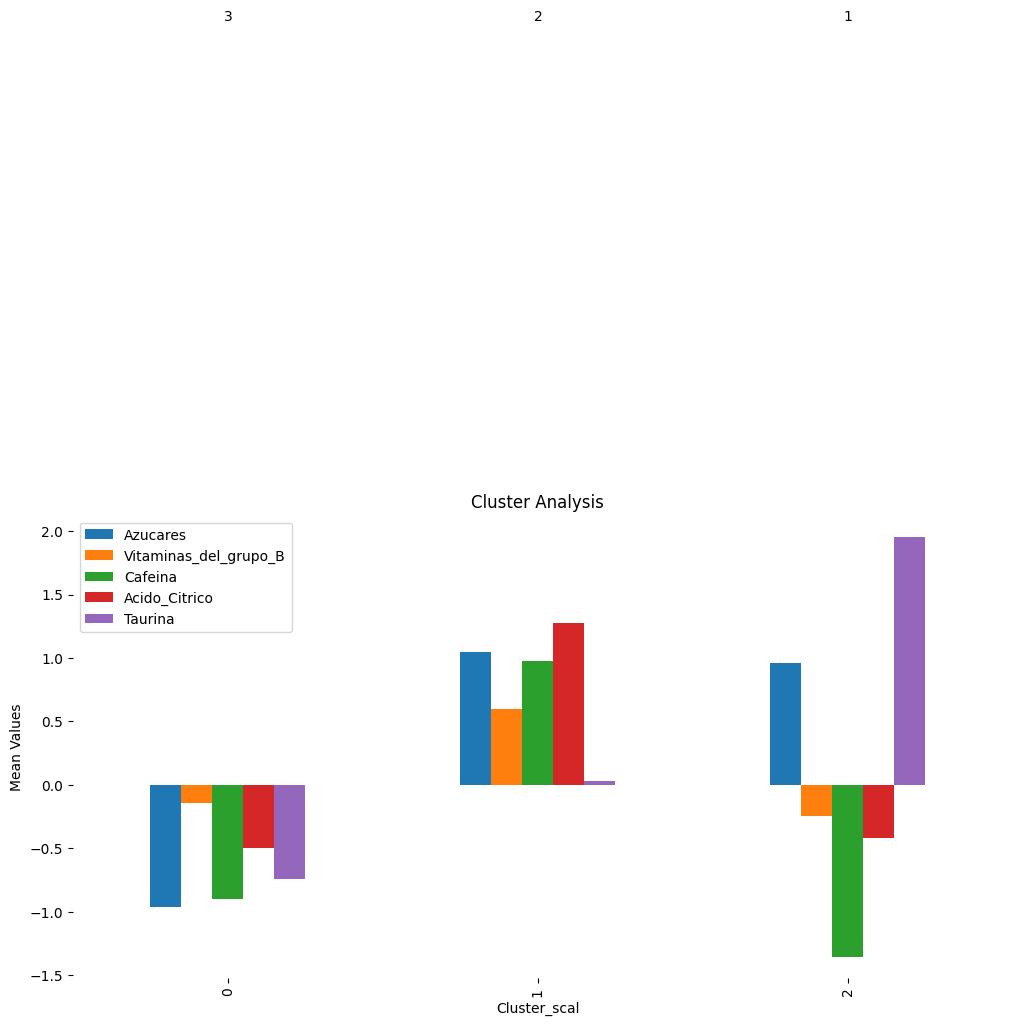

In [146]:
features_mean_by_cluster_scal_df_new = df_new[features + ["Cluster_scal"]].groupby('Cluster_scal').mean()
features_mean_by_cluster_scal_df_new['Freq'] = df_new['Cluster_scal'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
features_mean_by_cluster_scal_df_new.iloc[:, :-1].plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Values')
ax.set_title('Cluster Analysis')
for i, v in enumerate(features_mean_by_cluster_scal_df_new['Freq']):
    ax.text(i, max(features_mean_by_cluster_scal_df_new.iloc[:, :-1].max().max(), 5) + 1, str(v), ha='center', va='bottom')
sns.despine(left=True, bottom=True)
plt.show()

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.